In [1]:
# OpenCV and Math
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Python 
from pathlib import Path
import logging

# Our module
from module.getSwt import get_swt
from module.connectComponents import connect_components
from module.findLetters import find_letters
from module.findWords import find_words

In [2]:
OUTPUT_FOLDER = 'output/'
INPUT_IMAGE = '../../images/16.jpg'

In [3]:
# Creating Logger manager

LOGGER = logging.getLogger(__name__)

In [4]:
# Checking existing file?

image_file = Path(INPUT_IMAGE)
if not image_file.is_file() or INPUT_IMAGE.split('.')[-1] not in ['jpg', 'JPG', 'jpeg', 'JPEG']:
    LOGGER.error('File is not JPEG type.')   

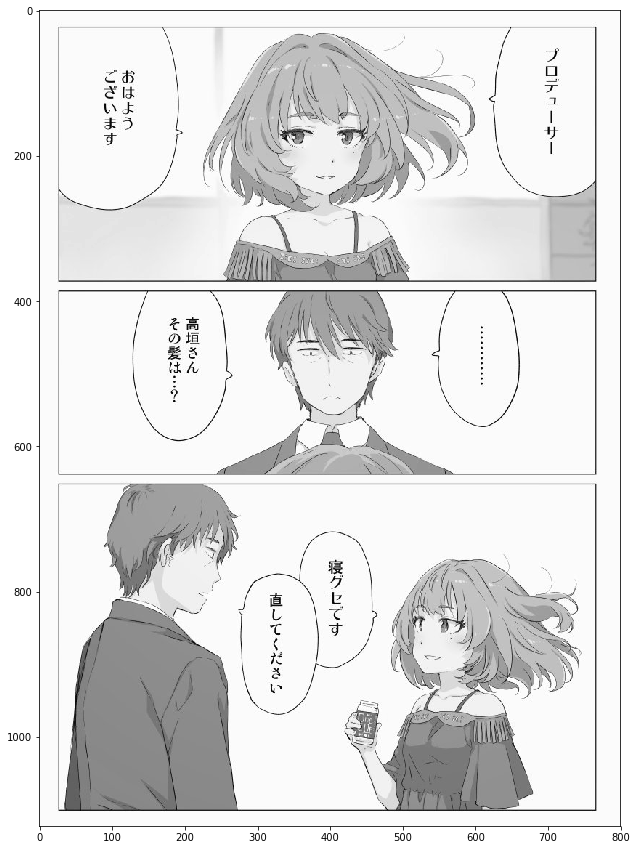

In [5]:
SRC = cv2.imread(INPUT_IMAGE)
SRC_GRAY = cv2.cvtColor(SRC, cv2.COLOR_BGR2GRAY)
HEIGHT, WIDTH = SRC.shape[:2]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.imshow(SRC_GRAY, cmap='gray', interpolation='none')

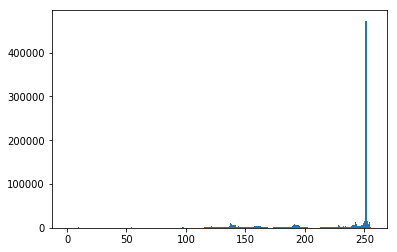

In [6]:
# SRC_GRAY's histogram

plt.hist(SRC_GRAY.ravel(),256,[0,256])
plt.show()

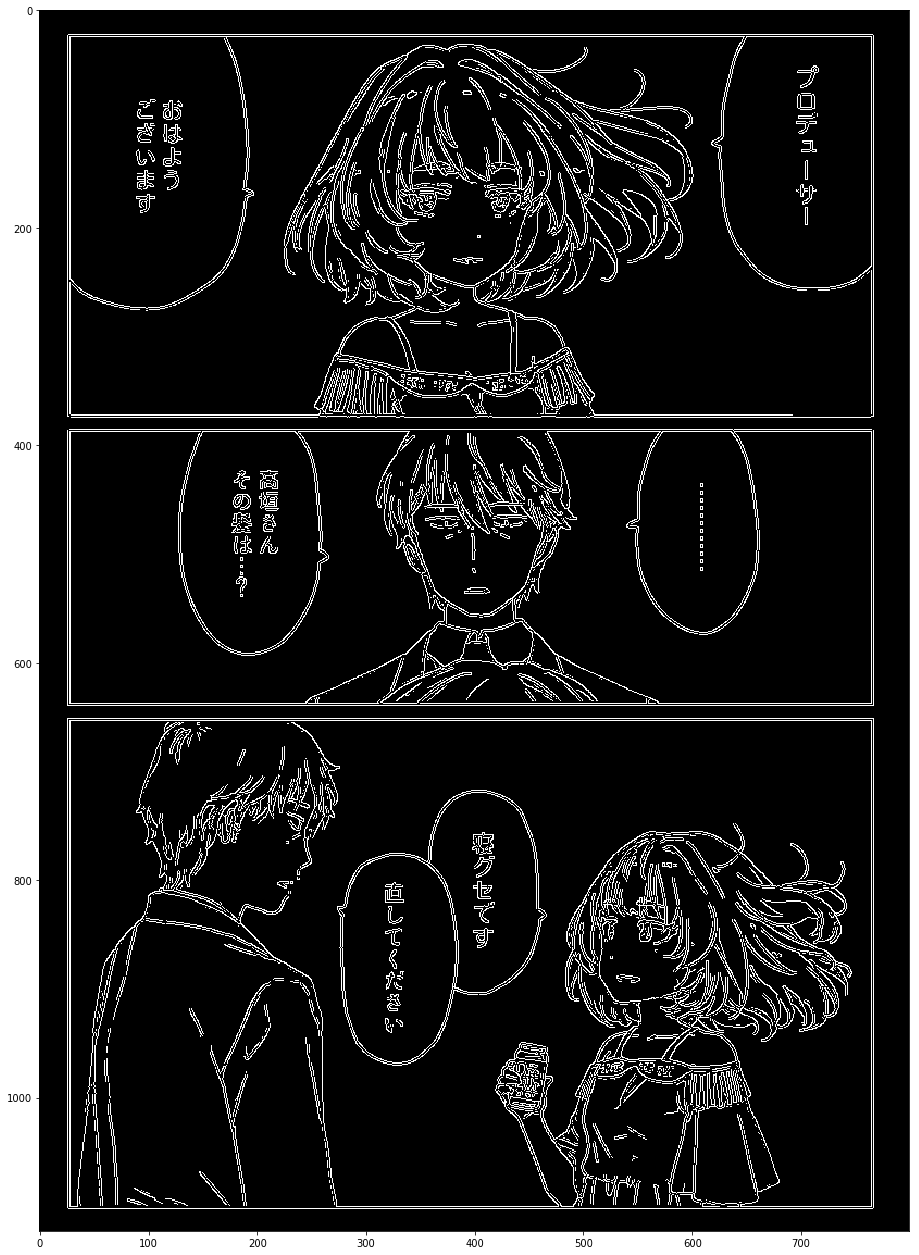

In [16]:
EDGES = cv2.Canny(SRC_GRAY, 100, 150)

fig = plt.figure(figsize=(WIDTH/50, HEIGHT/50))
ax = fig.add_subplot(111)
ax.imshow(EDGES, cmap='gray', interpolation='none')

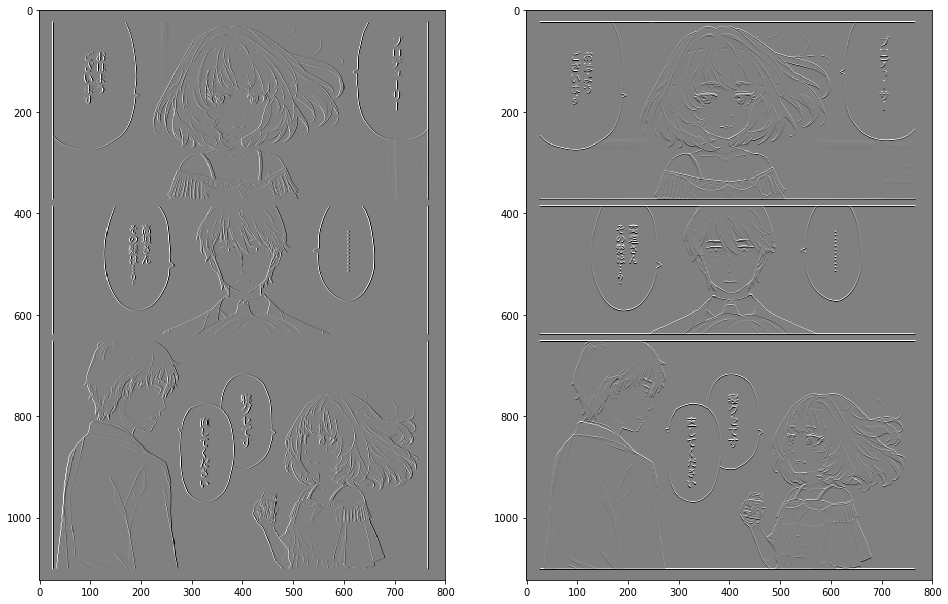

In [23]:
# Get Magnitude and gradient angel
        
invert_gray_image = cv2.bitwise_not(SRC_GRAY)
sobel_x = cv2.Sobel(invert_gray_image, cv2.CV_64F, 1, 0)
sobel_y = cv2.Sobel(invert_gray_image, cv2.CV_64F, 0, 1)

fig = plt.figure(figsize=(WIDTH/50, HEIGHT/50))

ax = fig.add_subplot(121)
ax.imshow(sobel_x, cmap='gray', interpolation='none')

ax = fig.add_subplot(122)
ax.imshow(sobel_y, cmap='gray', interpolation='none')

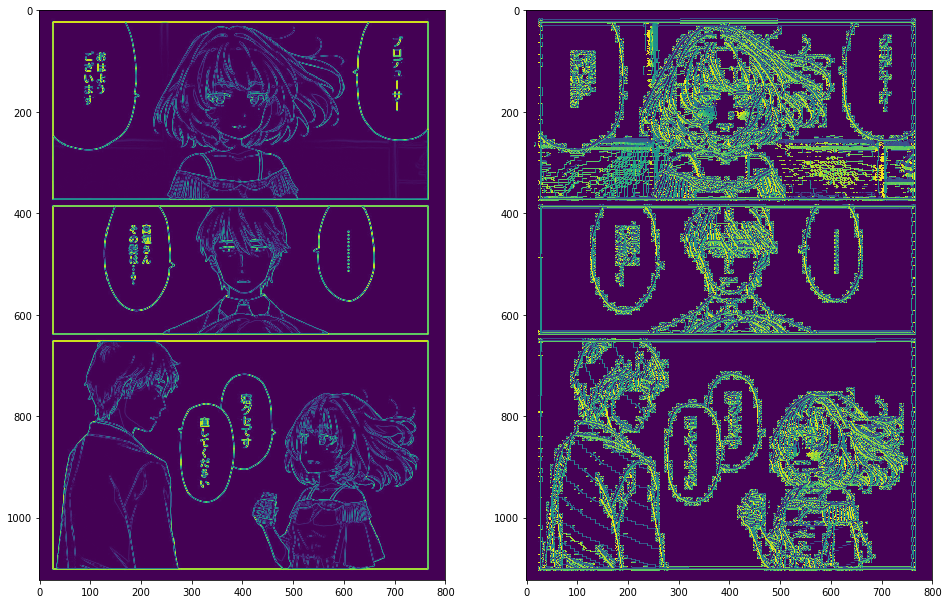

In [29]:
# Getting magnitude and direction

mag, angle = cv2.cartToPolar(sobel_x, sobel_y)

fig = plt.figure(figsize=(WIDTH/50, HEIGHT/50))
ax = fig.add_subplot(121)

ax.imshow(mag)

ax = fig.add_subplot(122)
ax.imshow(angle)